Loading diabetes dataset from scikit-learn...

Dataset loaded: 442 patients
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

First few rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


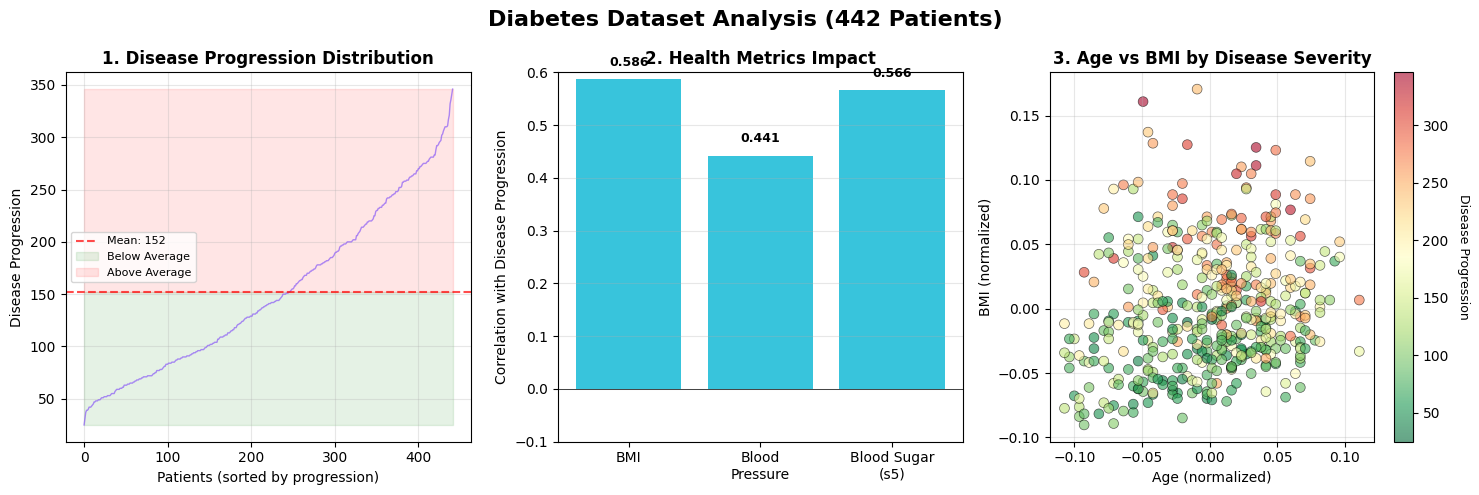


DIABETES DATASET SUMMARY STATISTICS
Total Patients: 442

Disease Progression (Target Variable):
  Mean: 152.1
  Median: 140.5
  Min: 25.0
  Max: 346.0
  Std Dev: 77.1

Top 3 Correlated Features with Disease Progression:
  1. bmi: 0.586
  2. s5: 0.566
  3. bp: 0.441

Patients with high progression (>200): 121 (27.4%)
Patients with low progression (<100): 147 (33.3%)

💡 Note: This dataset uses normalized/scaled features.
   Features like age, sex, bmi are already preprocessed.
   Target represents disease progression one year after baseline.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Load the built-in diabetes dataset from scikit-learn
# This dataset contains 442 patients with 10 features
# Target: disease progression one year after baseline
print("Loading diabetes dataset from scikit-learn...")
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

print(f"\nDataset loaded: {len(df)} patients")
print(f"Features: {list(diabetes.feature_names)}")
print(f"\nFirst few rows:")
print(df.head())

# For visualization, we'll focus on key health metrics
# Let's create time-series-like data by sorting by disease progression
df_sorted = df.sort_values('target').reset_index(drop=True)
df_sorted['patient_id'] = range(len(df_sorted))

# Create figure with 3 subplots
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Diabetes Dataset Analysis (442 Patients)', fontsize=16, fontweight='bold')

# Visualization 1: Disease Progression Trend
ax1 = plt.subplot(1, 3, 1)
ax1.plot(df_sorted['patient_id'], df_sorted['target'], color='#8b5cf6', linewidth=1, alpha=0.7)
ax1.axhline(y=df['target'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {df["target"].mean():.0f}')
ax1.fill_between(df_sorted['patient_id'], df['target'].min(), df['target'].mean(),
                  alpha=0.1, color='green', label='Below Average')
ax1.fill_between(df_sorted['patient_id'], df['target'].mean(), df['target'].max(),
                  alpha=0.1, color='red', label='Above Average')
ax1.set_xlabel('Patients (sorted by progression)', fontsize=10)
ax1.set_ylabel('Disease Progression', fontsize=10)
ax1.set_title('1. Disease Progression Distribution', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8)

# Visualization 2: Key Health Metrics Comparison
ax2 = plt.subplot(1, 3, 2)
# Calculate correlations with target (disease progression)
correlations = df[['bmi', 'bp', 's5', 'target']].corr()['target'].drop('target')
metrics = ['BMI', 'Blood\nPressure', 'Blood Sugar\n(s5)']
colors = ['#06b6d4' if x > 0 else '#ef4444' for x in correlations.values]
bars = ax2.bar(metrics, correlations.values, color=colors, alpha=0.8)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_ylabel('Correlation with Disease Progression', fontsize=10)
ax2.set_title('2. Health Metrics Impact', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(-0.1, 0.6)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02 if height > 0 else height - 0.02,
             f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top',
             fontsize=9, fontweight='bold')

# Visualization 3: Age vs BMI with Disease Severity
ax3 = plt.subplot(1, 3, 3)
# Normalize features for better visualization (they're already scaled in the dataset)
scatter = ax3.scatter(df['age'], df['bmi'], c=df['target'],
                     cmap='RdYlGn_r', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Age (normalized)', fontsize=10)
ax3.set_ylabel('BMI (normalized)', fontsize=10)
ax3.set_title('3. Age vs BMI by Disease Severity', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Disease Progression', rotation=270, labelpad=15, fontsize=9)

plt.tight_layout()
plt.show()

# Print comprehensive summary statistics
print("\n" + "="*60)
print("DIABETES DATASET SUMMARY STATISTICS")
print("="*60)
print(f"Total Patients: {len(df)}")
print(f"\nDisease Progression (Target Variable):")
print(f"  Mean: {df['target'].mean():.1f}")
print(f"  Median: {df['target'].median():.1f}")
print(f"  Min: {df['target'].min():.1f}")
print(f"  Max: {df['target'].max():.1f}")
print(f"  Std Dev: {df['target'].std():.1f}")

print(f"\nTop 3 Correlated Features with Disease Progression:")
all_corr = df.corr()['target'].drop('target').sort_values(ascending=False)
for i, (feature, corr) in enumerate(all_corr.head(3).items(), 1):
    print(f"  {i}. {feature}: {corr:.3f}")

print(f"\nPatients with high progression (>200): {len(df[df['target'] > 200])} ({len(df[df['target'] > 200])/len(df)*100:.1f}%)")
print(f"Patients with low progression (<100): {len(df[df['target'] < 100])} ({len(df[df['target'] < 100])/len(df)*100:.1f}%)")
print("="*60)

print("\n💡 Note: This dataset uses normalized/scaled features.")
print("   Features like age, sex, bmi are already preprocessed.")
print("   Target represents disease progression one year after baseline.")